# Project: Soccer Database Invistigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### In this project I will investigate the Soccer Database in order to answer this question: 
> 
> #### What are the factors that affect the chances of a team winning a match?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [2]:
team = pd.read_csv('Team.csv')
team_att = pd.read_csv('Team_Attributes.csv')
players = pd.read_csv('Player.csv')
player_att = pd.read_csv('Player_Attributes.csv')
match = pd.read_csv('Match.csv')
team.info()
team_att.info()
players.info()
player_att.info()
match.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed          

In [3]:
match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [4]:
match.shape

(25979, 115)


# Data Cleaning

## We can drop N/A values from the player attributes file since they are few, there is a column with too many missing values in the team attributes file which is ('buildUpPlayDribbling')

In [5]:
player_att.dropna()
player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### The Match dataframe has too many columns (115) & 25+K records with many N/A Values we need to drop the N/A values + unnecessary columns for easier processing and visualization

In [7]:
match.drop(match.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis= 1, inplace= True)
match.drop(match.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis= 1, inplace= True)
match.info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [13]:
match.drop(match.columns[[11,12,13,14]], axis=1, inplace= True)
match.info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [14]:
match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000


### From the previous summary stats we can conclude that:
 - The home team has more goals on average than the away team, wich means it's likely that the home team wins.
 - The maximum scored goals in one match for a home team is 10 goals, and the maximum scored for an away team is 9 goals.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question: What are the factors affecting a team winning a match?

In [15]:
home_team_won = match.home_team_goal > match.away_team_goal
away_team_won = match.away_team_goal > match.home_team_goal
draw = match.home_team_goal == match.away_team_goal
match[home_team_won].info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
8          9           1          1  2008/2009      1  2008-08-16 00:00:00   
9         10           1          1  2008/2009     10  2008-11-01 00:00:00   
21        22           1          1  2008/2009     11  2008-11-07 00:00:00   
25        26           1          1  2008/2009     11  2008-11-08 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25970  25971       24558      24558  2015/2016      8  2015-09-12 00:00:00   
25973  25974       24558      24558  2015/2016      8  2015-09-13 00:00:00   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [16]:
match[away_team_won].info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
7          8           1          1  2008/2009      1  2008-08-16 00:00:00   
10        11           1          1  2008/2009     10  2008-10-31 00:00:00   
11        12           1          1  2008/2009     10  2008-11-02 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25961  25962       24558      24558  2015/2016      6  2015-08-23 00:00:00   
25963  25964       24558      24558  2015/2016      6  2015-08-22 00:00:00   
25964  25965       24558      24558  2015/2016      7  2015-08-29 00:00:00   
25966  25967       24558      24558  2015/2016      7  2015-08-30 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [17]:
match[draw].info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
5          6           1          1  2008/2009      1  2008-09-24 00:00:00   
6          7           1          1  2008/2009      1  2008-08-16 00:00:00   
12        13           1          1  2008/2009     10  2008-11-01 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25952  25953       24558      24558  2015/2016      4  2015-08-09 00:00:00   
25958  25959       24558      24558  2015/2016      5  2015-08-13 00:00:00   
25971  25972       24558      24558  2015/2016      8  2015-09-13 00:00:00   
25972  25973       24558      24558  2015/2016      8  2015-09-13 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   

       match_api_id  home_team_

### From the previous tables we can conclude that it's likely that a home team will win, so wether you play on your land or on your opponent's it can affect your chances of winning.

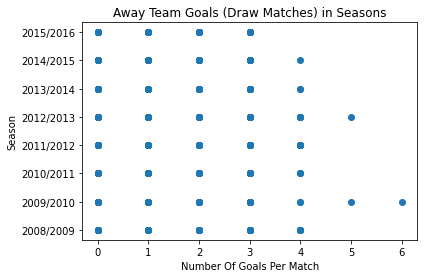

In [47]:
plt.scatter(match[draw]['away_team_goal'], match[draw]['season'])
plt.xlabel('Number Of Goals Per Match')
plt.ylabel('Season')
plt.title('Away Team Goals (Draw Matches) in Seasons')
plt.show()

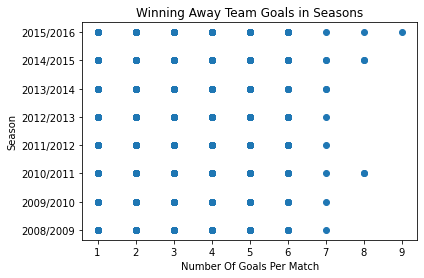

In [48]:
plt.scatter(match[away_team_won]['away_team_goal'], match[away_team_won]['season'])
plt.xlabel('Number Of Goals Per Match')
plt.ylabel('Season')
plt.title('Winning Away Team Goals in Seasons')
plt.show()

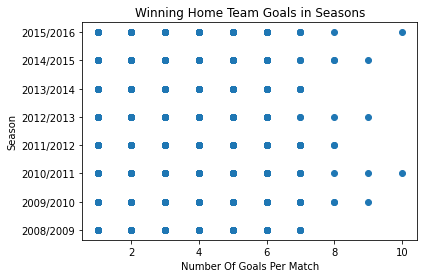

In [49]:
plt.scatter(match[home_team_won]['home_team_goal'], match[home_team_won]['season'])
plt.xlabel('Number Of Goals Per Match')
plt.ylabel('Season')
plt.title('Winning Home Team Goals in Seasons')
plt.show()

### From the previous graphs we can cinclude that:
- As the number of goals increase it becomes more rare to happen
- Home teams are more likely to score more goals
- The seasons have goals ranging nearly from 1-10, wich means they were overall entertaining :)

In [20]:
team_match = [team[['team_short_name','team_long_name','team_api_id']], match[home_team_won]]

home_team_won_name = pd.concat(team_match, axis = 1, join = 'inner', sort = True)
home_team_won_name

,team_short_name,team_long_name,team_api_id,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
3,LOK,Sporting Lokeren,9994,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
8,DEN,FCV Dender EH,7947,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0
9,STL,Standard de Liège,9985,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,1
21,O-H,Oud-Heverlee Leuven,1773,22,1,1,2008/2009,11,2008-11-07 00:00:00,492576,9984,10000,2,0
25,MUN,Manchester United,10260,26,1,1,2008/2009,11,2008-11-08 00:00:00,492580,10001,9987,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,SIO,FC Sion,10179,290,1,1,2008/2009,8,2008-10-18 00:00:00,492546,9985,9998,2,1
290,LUZ,FC Luzern,10199,291,1,1,2008/2009,8,2008-10-19 00:00:00,492547,10000,8635,4,0
291,VAD,FC Vaduz,9824,292,1,1,2008/2009,8,2008-10-18 00:00:00,492548,9994,8571,2,0
294,GAL,FC St. Gallen,10190,295,1,1,2008/2009,8,2008-10-18 00:00:00,492551,9996,9999,2,0


### Next step i'll investigate random teams from home winning teams to see the factors that may have affected their chances of winning.
The teams i'll investigate are: 
Roma (ROM), Chelsea (CHE), Valencia CF (VAL), and Napoli (NAP)

In [27]:
NAP = team['team_short_name'] == 'NAP'
NAP_att = [team[NAP], team_att]
NAP_att = pd.concat(NAP_att, axis = 1, join = 'inner')
NAP_att

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
137,20526,9875,48.0,Napoli,NAP,138,32,8178,2011-02-22 00:00:00,67,...,55,Normal,Organised,57,Medium,39,Press,51,Normal,Cover


In [28]:
CHE = team['team_short_name'] == 'CHE'
CHE_att = [team[CHE], team_att]
CHE_att = pd.concat(CHE_att, axis = 1, join = 'inner')
CHE_att

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
43,3475,8455,5.0,Chelsea,CHE,44,1861,9865,2014-09-19 00:00:00,46,...,40,Normal,Organised,37,Medium,53,Press,45,Normal,Cover


In [29]:
ROM = team['team_short_name'] == 'ROM'
ROM_att = [team[ROM], team_att]
ROM_att = pd.concat(ROM_att, axis = 1, join = 'inner')
ROM_att

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
136,20525,8686,52.0,Roma,ROM,137,32,8178,2010-02-22 00:00:00,70,...,70,Lots,Organised,70,High,60,Press,70,Wide,Cover


In [30]:
VAL = team['team_short_name'] == 'VAL'
VAL_att = [team[VAL], team_att]
VAL_att = pd.concat(VAL_att, axis = 1, join = 'inner')
VAL_att

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
77,9555,9873,110456.0,Valenciennes FC,VAL,78,2,10252,2011-02-22 00:00:00,65,...,50,Normal,Organised,35,Medium,45,Press,65,Normal,Cover
251,43035,10267,461.0,Valencia CF,VAL,252,1796,8191,2013-09-20 00:00:00,54,...,48,Normal,Organised,48,Medium,50,Press,58,Normal,Cover
266,43050,10281,462.0,Real Valladolid,VAL,267,647,7788,2014-09-19 00:00:00,45,...,57,Normal,Organised,42,Medium,49,Press,47,Normal,Cover


### We can make a custom function that just gets the team_short_name and return it's attributes

In [31]:
# noinspection PyGlobalUndefined
def get_team_att(name = 'team_short_name'):
    global name_att
    #if name in team['team_short_name']:
    name_att = [team[name], team_att]
    name_att = pd.concat(name_att, axis = 1, join = 'inner')
    return name_att
    #else:
        #return 'Error: Team not Found'

get_team_att(ROM)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
136,20525,8686,52.0,Roma,ROM,137,32,8178,2010-02-22 00:00:00,70,...,70,Lots,Organised,70,High,60,Press,70,Wide,Cover


In [32]:
get_team_att(VAL)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
77,9555,9873,110456.0,Valenciennes FC,VAL,78,2,10252,2011-02-22 00:00:00,65,...,50,Normal,Organised,35,Medium,45,Press,65,Normal,Cover
251,43035,10267,461.0,Valencia CF,VAL,252,1796,8191,2013-09-20 00:00:00,54,...,48,Normal,Organised,48,Medium,50,Press,58,Normal,Cover
266,43050,10281,462.0,Real Valladolid,VAL,267,647,7788,2014-09-19 00:00:00,45,...,57,Normal,Organised,42,Medium,49,Press,47,Normal,Cover


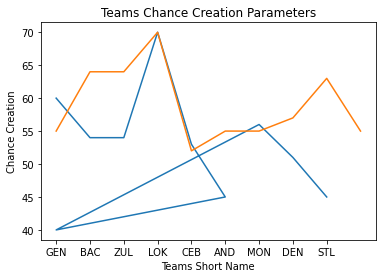

In [44]:
team_att_name = [team_att, team]
team_att_name = pd.concat(team_att_name, axis = 1, join = 'inner')
plt.plot(team_att_name['team_short_name'].head(10), team_att_name['chanceCreationPassing'].head(10), team_att_name['chanceCreationShooting'].head(10))
plt.xlabel('Teams Short Name')
plt.ylabel('Chance Creation')
plt.title('Teams Chance Creation Parameters')
plt.show()

In [42]:
home_team_won_name['team_short_name'].head(10)

3     LOK
8     DEN
9     STL
21    O-H
25    MUN
31    WHU
33    AVL
34    MCI
35    EVE
36    BLB
Name: team_short_name, dtype: object

### From the previous sample we can conclude some points:
- Chance creation in winning teams is 50 on average in all parameters.
- Their build-up play positioning class is mostly organised.
  

<a id='conclusions'></a>
## Conclusions

- Playing on your grounds can up your chances of winning.
- Chance creation (considering all parameters) in a match must be over 50 to get a greater chance in winning.
## Limitations
- The dataset has nearly all matches information regarding a league and a season. However, it doesn't have the team winning that league for each seson and that can lead the analysis to another question which is: What are the factors that can affect a team winning a league? and not just a match. 
  